<a href="https://colab.research.google.com/github/Jenniferduong20012004/LLMS_In_Smart_House/blob/jenny/Copy_of_virtualhome_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
agent_actions = ["TurnOn <object>", "TurnOff<object>", "begin_play<object>"]
agent_actions = ', '.join(agent_actions)

In [ ]:
#create agent as male 1 invisible:
comm.add_character('chars/Male1_invisible', initial_room='kitchen')

In [ ]:
success, graph = comm.environment_graph()
prev_graph = graph
def turnOnLight ():
  light_node = [x for x in graph['nodes'] if x['class_name'] == 'lightswitch'][0]
  light_node['states'] = ['ON']
def turnOnTv():
  tv_node = [x for x in graph['nodes'] if x['class_name'] == 'tv'][0]
  tv_node['states'] = ['ON']
import re
def extractService(output):
  pattern = r'service.*?\}'
  match = re.search(pattern, output, re.DOTALL)
  return match.group(0)

# gắn llm vào virtual home
def connect (output):
  text = extractService(output)



In [ ]:
success, graph = comm.environment_graph()
prev_graph = graph

light_node = [x for x in graph['nodes'] if x['class_name'] == 'lightswitch'][0]
tv_node['states'] = ['ON']
light_node['states'] = ['OFF']
_ = comm.expand_scene(graph)
last_graph = graph

# VirtualHome Collab Demo

This demo shows how to use VirtualHome to build synthetic scenes and run activites by one or multiple agents.

**Remember to activate a GPU environment in order to run this demo.**

## Install Packages

In [1]:
import matplotlib.pyplot as plt
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !pip install git+https://github.com/xavierpuigf/colabstreamer
    !git clone https://github.com/xavierpuigf/virtualhome.git
    import colabstreamer
    colabstreamer.config_all()
    _xorg = colabstreamer.open_xorg()
    display = "0"
else:
    import getpass
    import os
    password = getpass.getpass()
    %cd ../..
    !git clone https://github.com/xavierpuigf/virtualhome.git
    %cd virtualhome/helper_scripts
    command = 'sudo -S python startx.py 1'
    display = "1"
    os.popen(command, 'w').write(password+'\n')
    %cd ../../


Running on CoLab
  Cloning https://github.com/xavierpuigf/colabstreamer to /tmp/pip-req-build-4rsp57g0
  Running command git clone --filter=blob:none --quiet https://github.com/xavierpuigf/colabstreamer /tmp/pip-req-build-4rsp57g0
  Resolved https://github.com/xavierpuigf/colabstreamer to commit 5409c8f3b2dc1c169e1261aadf61353d3b50b8cf
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 8.0 MB/s eta 0:00:00
  Created wheel for colabstreamer.py: filename=colabstreamer.py-0.1-py3-none-any.whl size=3803 sha256=04b27c86e6c14bed741af41181b658b886e5675833e4b3df4c7a8cc844fe07e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhji_1xl/wheels/43/46/80/241030a5374680c6adbd25bf43d4b7fd77042b493e05e5fd7b
Successfully built colabstreamer.py
Cloning into 'virtualhome'...
remote: Enumerating objects: 27296, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 27296 (delta 32), reused 53 (de

## Download simulator

In [ ]:
# Download the simulator
! wget http://virtual-home.org/linux_exec.zip
! unzip -q linux_exec.zip
import os
fpath = os.getcwd()

--2024-08-14 13:23:45--  http://virtual-home.org/linux_exec.zip
Resolving virtual-home.org (virtual-home.org)... 128.30.100.223
Connecting to virtual-home.org (virtual-home.org)|128.30.100.223|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 901763908 (860M) [application/zip]
Saving to: ‘linux_exec.zip’

linux_exec.zip      100%[===================>] 859.99M  1.19MB/s    in 12m 18s 

2024-08-14 13:36:03 (1.17 MB/s) - ‘linux_exec.zip’ saved [901763908/901763908]



In [ ]:
fpath

'/content'

In [ ]:
%cd /content/virtualhome/virtualhome/simulation/unity_simulator

/content/virtualhome/virtualhome/simulation/unity_simulator


In [ ]:
!ls /content/virtualhome/virtualhome/simulation/unity_simulator/

communication.py  comm_unity.py  __init__.py  __pycache__  README.md  utils_viz.py


In [ ]:
!python -m unity_simulator.comm_unity

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'unity_simulator.comm_unity' found in sys.modules after import of package 'unity_simulator', but prior to execution of 'unity_simulator.comm_unity'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


In [ ]:
%cd /content/virtualhome/virtualhome/simulation
!pip install ipdb

/content/virtualhome/virtualhome/simulation
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
!python -m unity_simulator.utils_viz

In [ ]:
%cd /content/virtualhome/virtualhome
!python -m demo.utils_demo

/content/virtualhome/virtualhome


In [ ]:
!apt-get install -y xvfb
!pip install pyvirtualdisplay
from pyvirtualdisplay import Display

display = Display(visible=0, size=(1024, 768))
display.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
The following package was automatically installed and is no longer required:
  libfuse2
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

In [ ]:
!ps aux | grep linux_exec.x86_64

root       22292  149  9.5 7169196 1268060 ?     Rsl  14:03   9:33 /content/linux_exec.x86_64 -batch
root       23910  0.0  0.0   6620  2264 ?        S    14:10   0:00 grep linux_exec.x86_64


# Start simulation

In [ ]:
import sys
# sys.path.append('/content/virtualhome/virtualhome/simulation/unity_simulator')
# from simulation.unity_simulator import comm_unity
import sys
sys.path.append('/content/virtualhome/virtualhome/simulation/unity_simulator')

import comm_unity
import demo.utils_demo as utils_demo
%matplotlib notebook
import IPython.display
#comm = comm_unity.UnityCommunication(file_name=f"{fpath}/linux_exec.x86_64", port='8085', x_display=display)

# Assuming display has been started
x_display = os.environ['DISPLAY'].split(':')[-1]  # Get the display number

comm = comm_unity.UnityCommunication(file_name=f"{fpath}/linux_exec.x86_64", port='8085', x_display=x_display)

AssertionError: Invalid DISPLAY :1 - cannot find X server with xdpyinfo

In [ ]:
!cat /content/virtualhome/virtualhome/simulation/unity_simulator/Player_8085.log

cat: /content/virtualhome/virtualhome/simulation/unity_simulator/Player_8085.log: No such file or directory


# Starting and Visualizing Scenes
We will start scene number 0 and start visualizing it. We start it by calling reset. Scenes are numbered from 0 to 6.



In [ ]:
comm.reset(0)
indices = [3, 32, -5, -1, -20, 15, 48, -8]
img_final = utils_demo.display_scene_cameras(comm, indices, nrows=2)
IPython.display.display(img_final)


AttributeError: module 'collections' has no attribute 'Iterable'

## VirtualHome supports multiple modalities

The cameras can also display other modalities, such as semantic segmentation, depth, instance segmentation or optical flow when playing videos. We will display a few of those here.

In [ ]:
indices = [-20, 15, 48, -8]
img_final = utils_demo.display_scene_modalities(
    comm,
    indices,
    modalities=['normal', 'seg_class', 'seg_inst', 'depth', 'surf_normals'], nrows=5)
IPython.display.display(img_final)

AttributeError: module 'collections' has no attribute 'Iterable'

## Visualizing the scene as a graph
Each scene in VirtualHome can be visualized as a graph, allowing to query the objects appearing, and their relationships. We start by obtaining the graph from the current scene.

The graph is a dictionary with nodes and edges. Each node corresponds to an object and contains information such as:

- class_name: the object_name
- states: in which state the object is
- id: a number you can use to perform actions over the object

In [ ]:
s, graph = comm.environment_graph()
graph['nodes'][140]

## Modify the scene

In the previous section we viewed how to read and visualize the environment. Now we are interested in modifying the environment to perform activities in them.



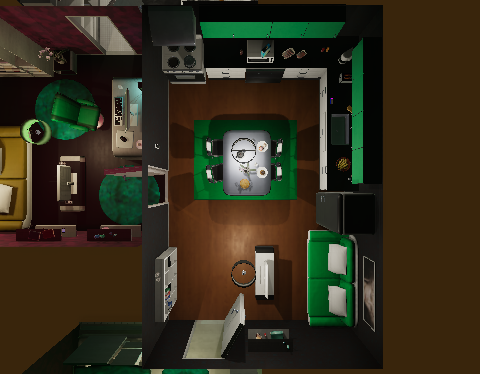

In [ ]:
comm.reset(4)
imgs_prev = utils_demo.get_scene_cameras(comm, [-4])
utils_demo.display_grid_img(imgs_prev, nrows=1)

## Adding objects
We can start by adding objects. Let's add a cat in the sofa

In [ ]:
success, graph = comm.environment_graph();
sofa = utils_demo.find_nodes(graph, class_name='sofa')[-2]
print(sofa)

{'id': 139, 'category': 'Furniture', 'class_name': 'sofa', 'prefab_name': 'PRE_FUR_Sofa_02_03_02_01', 'obj_transform': {'position': [6.888, 0.051, -4.879], 'rotation': [0.0, 1.0, 0.0, 3.57627869e-07]}, 'bounding_box': {'center': [6.89529371, 0.5715897, -4.879], 'size': [0.9469976, 0.885002553, 2.155935]}, 'properties': ['SURFACES', 'SITTABLE', 'LIEABLE', 'MOVABLE'], 'states': []}


In [ ]:
utils_demo.add_node(graph, {'class_name': 'cat',
                   'category': 'Animals',
                   'id': 1000,
                   'properties': [],
                   'states': []})
utils_demo.add_edge(graph, 1000, 'ON', sofa['id'])

In [ ]:
success, message = comm.expand_scene(graph)


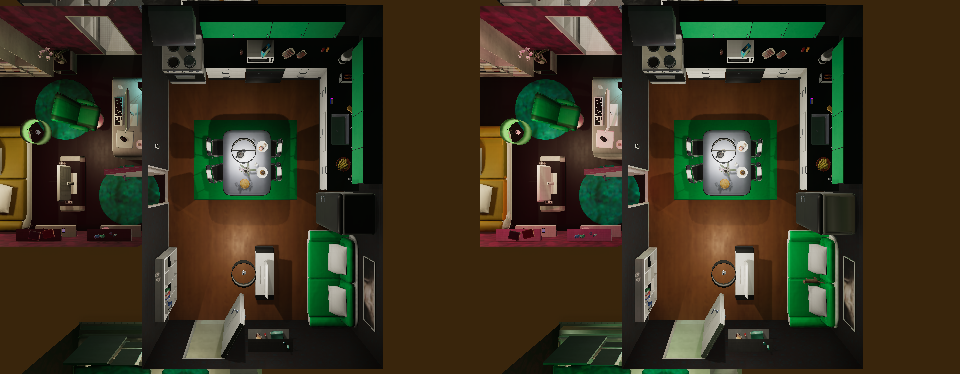

In [ ]:
imgs_final = utils_demo.get_scene_cameras(comm, [-4])
utils_demo.display_grid_img(imgs_prev+imgs_final, nrows=1)


## Changing the state of objects

We will use the same method as before to change the state of some appliances. Again just by modifying the state of the graph.

We take a picture of the apartment to see how it looks before doing any change

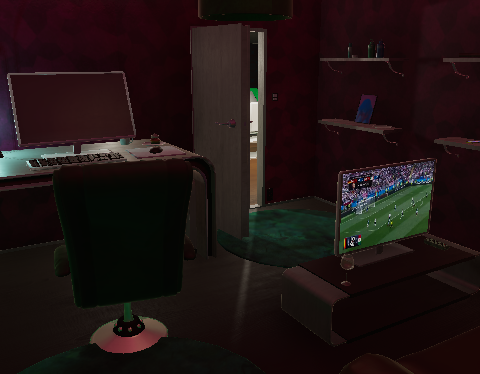

In [ ]:

indices = [0]
imgs_prev = utils_demo.get_scene_cameras(comm, indices)
utils_demo.display_grid_img(imgs_prev, nrows=1)

We now get the graph of the environment, and select a TV and a light



In [ ]:
success, graph = comm.environment_graph()
prev_graph = graph
tv_node = [x for x in graph['nodes'] if x['class_name'] == 'tv'][0]
light_node = [x for x in graph['nodes'] if x['class_name'] == 'lightswitch'][0]

And change their state

In [ ]:
tv_node['states'] = ['ON']
light_node['states'] = ['OFF']
_ = comm.expand_scene(graph)
last_graph = graph

Let's plot the new image


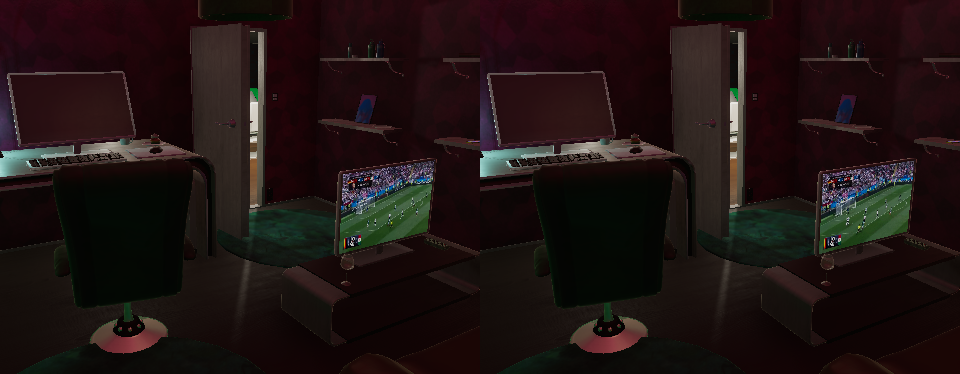

In [ ]:

imgs_final = utils_demo.get_scene_cameras(comm, indices)
utils_demo.display_grid_img(imgs_prev+imgs_final, nrows=1)

## Generating Scripts

We now can start scenes, visualize them and modify them. The last step is to perform activities in them. We do this by defining scripts: Lists of instructions that will be executed in sequence. Each instruction contains an action, an object, and an id. The id should match with the id of each of the nodes in the environment graph.



### Adding a character
The first step is to add agents in the environment, that will be performing the activity. You can specify which agent you want to add and the room where you want to add it


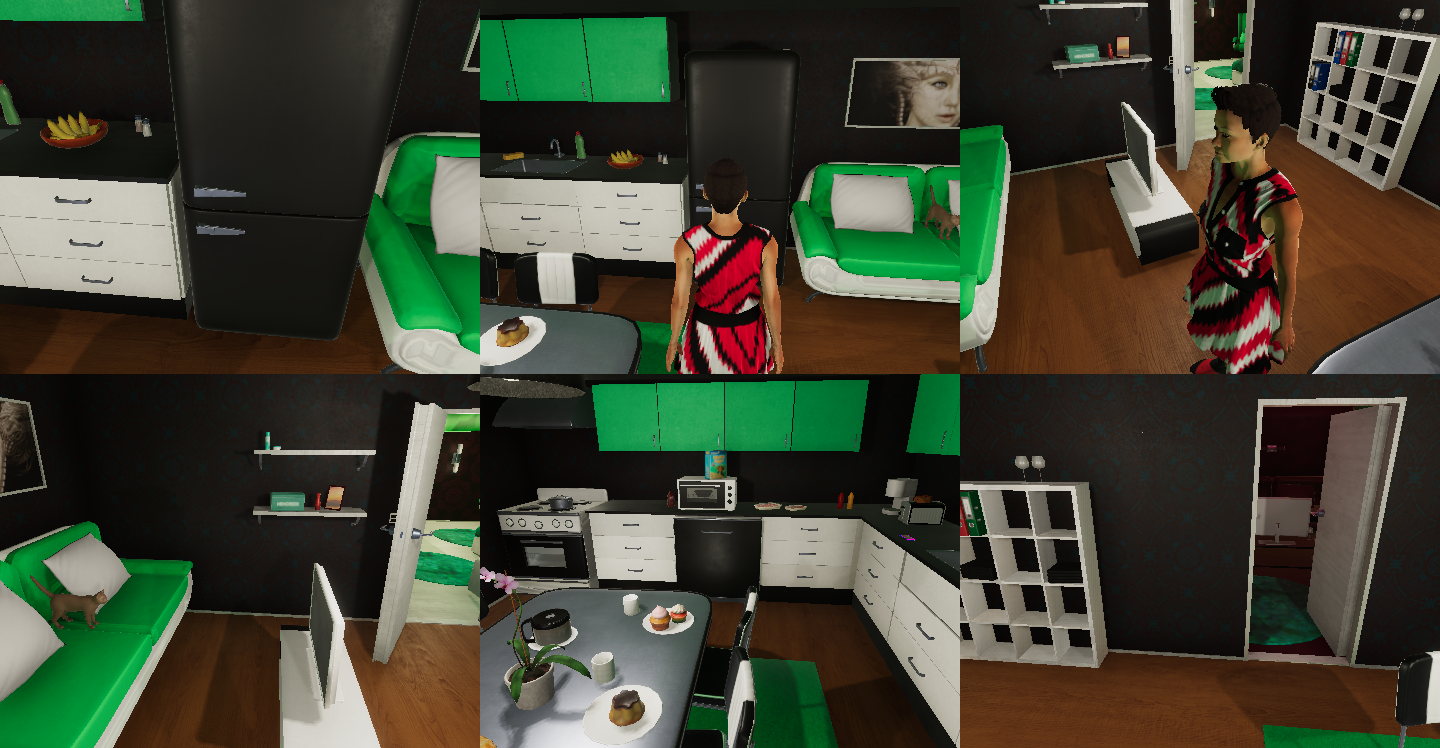

In [ ]:
comm.reset(4)
tv_node['states'] = ['OFF']
comm.expand_scene(prev_graph)
comm.add_character('chars/Female2', initial_room='kitchen')
s, g = comm.environment_graph()
cat_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'cat'][0]

s, nc = comm.camera_count()
indices = range(nc - 6, nc)
imgs_prev = utils_demo.get_scene_cameras(comm, indices)
utils_demo.display_grid_img(imgs_prev, nrows=2)

## Generating the first script
Let's start by interacting witht the cat and the sofa that we set up before. The cat had id 1000. The sofa was stored in a variable sofa containing that node. We can query its id directly. This sequence will make the agent walk to the sofa, grab the cat and sit in the sofa.

In [ ]:
script = ['<char0> [Walk] <sofa> ({})'.format(sofa['id']),
          '<char0> [Find] <cat> ({})'.format(cat_id),
          '<char0> [Grab] <cat> ({})'.format(cat_id),
          '<char0> [Sit] <sofa> ({})'.format(sofa['id'])]

In [ ]:
success, message = comm.render_script(script=script,
                                      processing_time_limit=60,
                                      find_solution=False,
                                      image_width=320,
                                      image_height=240,
                                      skip_animation=False,
                                      recording=True,
                                      save_pose_data=True,
                                      file_name_prefix='relax')

In [ ]:
path_video = "./Output/"
from simulation.unity_simulator import utils_viz
utils_viz.generate_video(input_path=path_video, prefix='relax', output_path='.')

Video generated at  ./video_normal.mp4


In [ ]:
utils_demo.display_vid('./video_normal.mp4')


<char0> [walk] <salmon> (328) | <char1> [walk] <glass> (283)
<char0> [grab] <salmon> (328) | <char1> [grab] <glass> (283)
<char0> [open] <microwave> (314) | <char1> [walk] <sink> (247)
<char0> [putin] <salmon> (328) <microwave> (314) | <char1> [putback] <glass> (283) <sink> (247)
<char0> [close] <microwave> (314) | <char1> [switchon] <faucet> (249)


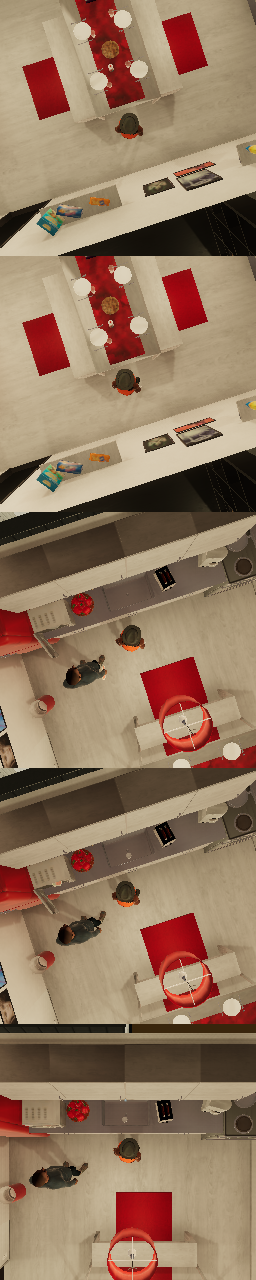

In [ ]:
# Reset the scene
comm.reset(0)
s, g = comm.environment_graph()
# Add two agents this time
comm.add_character('Chars/Male2', initial_room='kitchen')
comm.add_character('Chars/Female4', initial_room='bedroom')

# Get nodes for salmon and microwave, glass, faucet and sink
salmon_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'salmon'][0]
microwave_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'microwave'][0]
glass_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'waterglass'][-1]
sink_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'sink'][0]
faucet_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'faucet'][-1]


# Put salmon in microwave
script = [
   '<char0> [walk] <salmon> ({}) | <char1> [walk] <glass> ({})'.format(salmon_id, glass_id),
   '<char0> [grab] <salmon> ({}) | <char1> [grab] <glass> ({})'.format(salmon_id, glass_id),
   '<char0> [open] <microwave> ({}) | <char1> [walk] <sink> ({})'.format(microwave_id, sink_id),
   '<char0> [putin] <salmon> ({}) <microwave> ({}) | <char1> [putback] <glass> ({}) <sink> ({})'.format(salmon_id, microwave_id, glass_id, sink_id),
   '<char0> [close] <microwave> ({}) | <char1> [switchon] <faucet> ({})'.format(microwave_id, faucet_id)
]

s, cc = comm.camera_count()
ims = []
for script_instruction in script:
    s, m = comm.render_script([script_instruction], recording=False, skip_animation=True)
    print(script_instruction)
    # Here you can get an observation, for instance
    s, im = comm.camera_image([cc-7], image_width=256, image_height=256)
    ims.append(im[0])
utils_demo.display_grid_img(ims, nrows=len(ims))


## Planner Agent

### In Progess, coming up soon
--------------------------------

In [ ]:
%cd watch_and_help
import sys
import os
import ipdb
import pickle
import json
import random
import numpy as np
from pathlib import Path

from envs.unity_environment import UnityEnvironment
from agents import MCTS_agent
from arguments import get_args
from algos.arena_mp2 import ArenaMP
from utils import utils_goals

/data/vision/torralba/frames/data_acquisition/SyntheticStories/MultiAgent/challenge/release_final/release_github/watch_and_help


In [ ]:
dataset_path = './dataset/test_env_set_help.pik'
env_task_set = pickle.load(open(dataset_path, 'rb'))
executable_args = {
                    'file_name': None,
                    'x_display': int(display),
                    'no_graphics': True
    }
def env_fn(env_id):
        return UnityEnvironment(num_agents=1,
                                max_episode_length=250,
                                port_id=0,
                                env_task_set=env_task_set,
                                observation_types=['partial'],
                                use_editor=False,
                                executable_args=executable_args,
                                base_port=8085)